In [1]:
from datasets import Dataset, load_dataset

In [2]:
dataset_name = "pcuenq/face_synthetics_spiga"
faces = load_dataset(dataset_name, cache_dir='/mnt/d/ms_face')

Resolving data files:   0%|          | 0/63 [00:00<?, ?it/s]

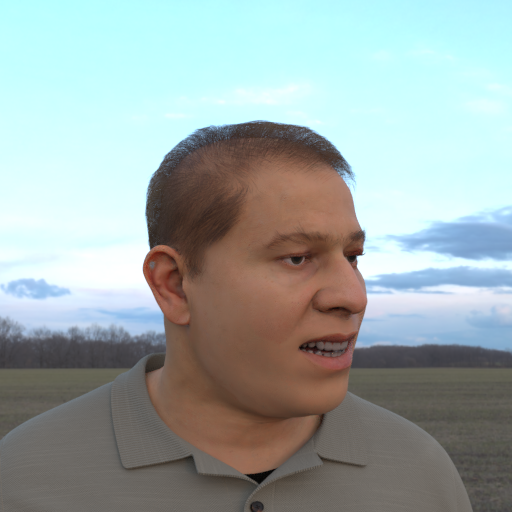

In [3]:
faces['train'][0]['image']

In [4]:
faces['train'][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512>,
 'image_seg': <PIL.PngImagePlugin.PngImageFile image mode=L size=512x512>,
 'landmarks': '192.230 262.053\n191.780 292.144\n195.308 316.175\n208.764 340.038\n223.689 358.825\n251.840 374.788\n281.742 389.506\n309.938 401.181\n331.289 406.249\n344.540 394.243\n344.738 377.607\n341.347 358.776\n334.990 343.067\n327.681 325.987\n320.890 304.892\n316.387 285.752\n314.373 261.943\n271.705 242.256\n287.295 238.164\n301.754 236.489\n312.941 237.718\n322.388 240.992\n351.971 239.414\n357.876 236.058\n361.575 235.396\n363.217 236.926\n360.741 241.154\n340.250 252.920\n349.375 267.875\n356.939 283.026\n361.942 302.023\n313.485 306.905\n330.609 315.701\n345.661 319.426\n352.511 314.488\n354.164 304.689\n281.031 258.207\n296.274 256.394\n303.676 255.579\n307.936 259.777\n303.357 263.662\n291.766 264.571\n341.620 258.161\n353.777 255.089\n357.948 254.649\n354.394 256.369\n355.596 262.740\n348.323 262.121\n298.561 347.938\n313.

In [12]:
from facenet_pytorch import MTCNN
from torchvision import transforms

mtcnn = MTCNN(image_size=512, margin=10, device='cuda', post_process=False)
to_pil = transforms.ToPILImage()

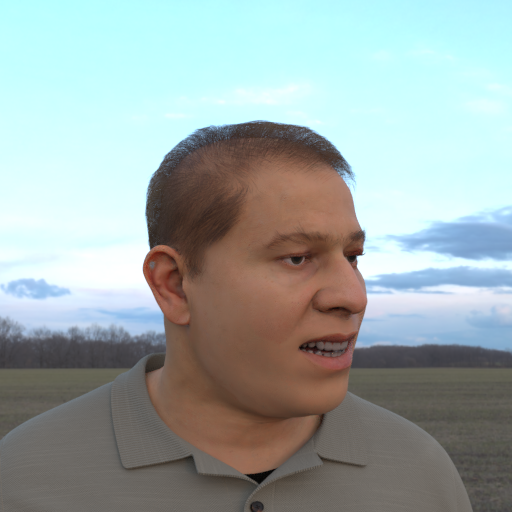

In [27]:
faces['train'][0]['image'].convert("RGB")

In [28]:
img_cropped = mtcnn(faces['train'][0]['image'].convert("RGB"))

In [33]:
img_cropped.shape

torch.Size([3, 512, 512])

In [35]:
img_cropped.min(),img_cropped.max()

(tensor(6.), tensor(255.))

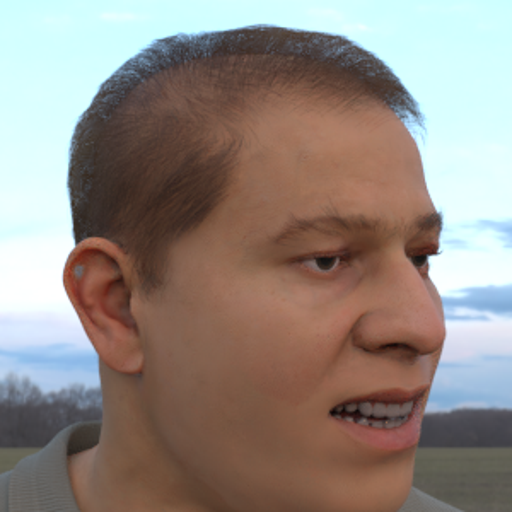

In [49]:
import torch
test = to_pil(img_cropped.to(torch.uint8)) 

test =faces['train'][0]['image']
# Get the dimensions of the image
width, height = test.size

# Calculate the coordinates for a center crop
crop_size = 300
left = (width - crop_size) / 2
top = (height - crop_size) / 2
right = left + crop_size  # Corrected
bottom = top + crop_size  # Corrected

# Crop and resize the image
image_cropped = test.crop((left, top, right, bottom))
image_resized = image_cropped.resize((512, 512))


image_resized


(-0.5, 511.5, 511.5, -0.5)

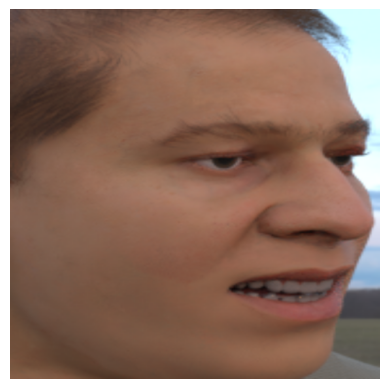

In [36]:
import numpy as np
from matplotlib import pyplot as plt


plt.imshow(img_cropped.permute(1, 2, 0).int().numpy())
plt.axis('off')

In [56]:
from facenet_pytorch import MTCNN

mtcnn = MTCNN(image_size=512, margin=10, device='cuda', post_process=False)
to_pil = transforms.ToPILImage()

def face_crop(examples):
    for image in examples['image']:
        img_cropped = mtcnn(image)
        if img_cropped is not None:
            examples['face_image'] = to_pil(img_cropped.to(torch.uint8))
        else:
            width, height = image.size

            # Calculate the coordinates for a center crop
            crop_size = 300
            left = (width - crop_size) / 2
            top = (height - crop_size) / 2
            right = left + crop_size  # Corrected
            bottom = top + crop_size  # Corrected

            # Crop and resize the image
            image_cropped = image.crop((left, top, right, bottom))
            image_resized = image_cropped.resize((512, 512))

            examples['face_image'] = image_resized

In [57]:
dataset = faces.map(face_crop, batched=True)

Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

: 